# Redes neuronales

José Luis Ruíz Reina<br>
Miguel A. Gutiérrez Naranjo <br>

Versión del 16 de diciembre de 2024

In [ ]:
# Conectamos Colab con mi Drive

from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/AA_2024

Vamos a ver ejemplos de uso de redes neuronales. En primer lugar, vamos a familiarizarnos con el uso de las redes neuronales jugando un rato con https://playground.tensorflow.org/. Luego realizaremos algunos experimentos simples con el módulo `neural_network` de scikit_learn para ilustrar la capacidad expresiva de los clasificadores basados en redes neuronales. Finalmente lo usaremos en un ejemplo de cáncer de mama.

En la asignatura de Deep Learning, volveremos a considerar de nuevo el perceptrón multicapa dentro del módulo [Keras](https://keras.io/).


# Parte 0: Jugando con redes neuronales

En esta primera parte introductoria, vamos a familiarizarnos con el uso de las redes neuronales jugando un rato en
https://playground.tensorflow.org/


# Parte 1: Redes neuronales en scikit_learn

Los ejemplos y la discusión de esta parte está tomada en parte del libro:

[*Introduction to Machine Learning with Python*](http://shop.oreilly.com/product/0636920030515.do)  
**Andreas C. Müller & Sarah Guido**  
O'Reilly 2017

Github con el material del libro: [Github](https://github.com/amueller/introduction_to_ml_with_python).

El libro está accesible *online* desde la [Biblioteca de la Universidad de Sevilla](https://fama.us.es), como recurso electrónico.

**ATENCIÓN**: Antes que nada, cargamos el módulo `mglearn`, que proporcionamos con este enunciado y que es una leve modificación del original, que se puede descargar del  [Github](https://github.com/amueller/introduction_to_ml_with_python) del libro anterior. Recordar que para que funcione la carga, debemos poner la carpeta `mglearn` en cualquiera de las carpetas que usa python para cargar sus módulos (normalmente, funcionará colocando la carpeta `mglearn` en la misma carpeta en la que se coloque este _notebook_).

**Nota:** Si tienes una versión reciente de la librería _joblib_ es posible que tengas problemas de compatibilidad con _mglearn_. Esto puedes solucionarlo instalando la versión 1.1.0

In [90]:
!pip install joblib==1.1.0

In [91]:
import mglearn

Cargamos también otras librerías

In [92]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn.datasets import make_circles, make_moons, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import stats
import numpy as np
from keras.utils import to_categorical

El módulo para trabajar con redes neuronales en scikit_learn es `neural_network`, y dentro del mismo `MLPClassifier` nos permitirá usar las redes multicapa hacia adelante, las que hemos visto en este tema.

In [93]:
from sklearn.neural_network import MLPClassifier

En primer lugar, vamos a empezar con la puerta lógica XOR, que nos servirá para una primera toma de contacto.

| a1 | a2 | a1 XOR a2
| ---:|:---:|:---:
| 1  | 1 | 0
| 1  | 0 | 1
| 0  | 1 | 1
| 0  | 0 | 0

In [94]:
X_xor= np.array([[1,1],
                 [1,0],
                 [0,1],
                 [0,0]],dtype='float32')

y_xor = np.array([0,1,1,0],dtype='int8')

Podemos ver su representación gráfica

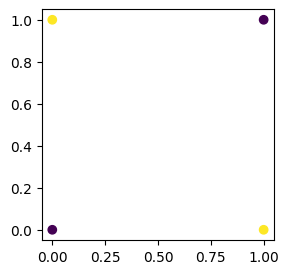

In [95]:
mpl.rcParams['figure.figsize'] = (3,3) # Para el tamaño de la imagen
plt.scatter(X_xor[:,0],X_xor[:,1],c=y_xor)
plt.show()

Del mismo modo que ocurría en los árboles de decisión, en primer lugar creamos una instancia concreta de la clase
MLPClassifier. Podéis ver los parámetros de la red en este enlace [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). En esta primera aproximación consideramos una única capa oculta con dos neuronas y la función sigmoide como función de activación. Para el sistema de optimización, en lugar de usar SGD usamos LBFGS, que es un optimizador de la familia de los métodos de Newton, que funciona mejor con conjuntos de datos pequeños. Más información [aquí](http://fuzihao.org/blog/2016/01/16/Comparison-of-Gradient-Descent-Stochastic-Gradient-Descent-and-L-BFGS/).


In [96]:
np.random.seed(23) #Fijamos la semilla para números aleatorios

mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), max_iter= 1000,activation='logistic',solver='lbfgs')

Entrenamos la red

In [97]:
mlp_xor.fit(X_xor, y_xor)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=1000,
              solver='lbfgs')

Como ocurría con los árboles de decisión, la entrenar un modelo en scikit-learn, nos devuelve el valor de los parámetros con los que se ha realizado el entrenamiento. Vamos a usar 'mglearn' para dibujar las regiones en las que se divide el plano.

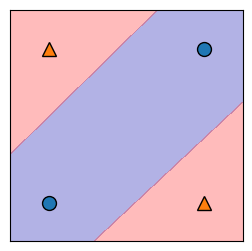

In [99]:
mglearn.plots.plot_2d_separator(mlp_xor, X_xor, fill=True, alpha=.3)
mglearn.discrete_scatter(X_xor[:, 0], X_xor[:, 1], y_xor);

Podemos ver el esquema de la red que hemos construido

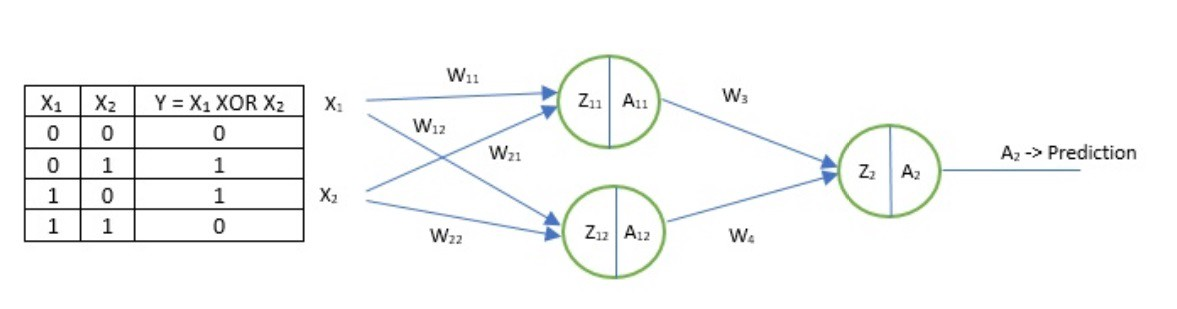

In [100]:
from IPython import display
display.Image("./xor.jpeg")

Podemos obtener las matrices de pesos (sin las entradas ficticias _bias_)

In [101]:
mlp_xor.coefs_

[array([[ 6.36750737,  6.46886076],
        [-6.76499304, -6.55113301]]),
 array([[ 14.3711465],
        [-14.1999279]])]

También podemos obtener los pesos de las entradas ficticias _(bias)_

In [102]:
mlp_xor.intercepts_

[array([-3.57055985,  3.64184097]), array([7.04657212])]

Siguiendo el dibujo, podemos obtener los valores de los pesos

In [103]:
# Pesos de las matrices
w_11 = mlp_xor.coefs_[0][0][0]
w_12 = mlp_xor.coefs_[0][0][1]
w_21 = mlp_xor.coefs_[0][1][0]
w_22 = mlp_xor.coefs_[0][1][1]
w_3 = mlp_xor.coefs_[1][0][0]
w_4 = mlp_xor.coefs_[1][1][0]

# Entradas ficticias
w_01 = mlp_xor.intercepts_[0][0]
w_02 = mlp_xor.intercepts_[0][1]
w_03 = mlp_xor.intercepts_[1][0]

In [104]:
w_11

6.3675073708642405

A partir de esos valores podemos expresar la red como la siguiente función

In [105]:
def sigmoide(x):
    return 1 / (1 + math.exp(-x))

@np.vectorize
def f_mlp_xor(x1,x2):
    # Salidas de a capa de entrada
    a1 = x1
    a2 = x2
    # Salidas de la capa oculta
    a3 = sigmoide(w_01 + (a1 * w_11) + (a2 * w_21))
    a4 = sigmoide(w_02 + (a1 * w_12) + (a2 * w_22))
    # Salida de la única neurona de la cpa de salida
    a5 = sigmoide(w_03 + (a3 * w_3) + (a4 * w_4))
    return a5

Podemos ver la salida de la función sobre los valores del conjunto de entrenamiento. Nótese que estamos tomando la función sigmoide _(logistic)_ como función de activación y por tanto los valores 0 y 1 no se alcanzan nunca.

In [108]:
print('Valor en (0,0) (0 en el conjunto de entrenamiento):',f_mlp_xor(0,0))
print('Valor en (0,1) (1 en el conjunto de entrenamiento):',f_mlp_xor(0,1))
print('Valor en (1,0) (1 en el conjunto de entrenamiento):',f_mlp_xor(1,0))
print('Valor en (1,1) (0 en el conjunto de entrenamiento):',f_mlp_xor(1,1))

Valor en (0,0) (0 en el conjunto de entrenamiento): 0.001663071567148327
Valor en (0,1) (1 en el conjunto de entrenamiento): 0.9981906149747304
Valor en (1,0) (1 en el conjunto de entrenamiento): 0.9983281979348
Valor en (1,1) (0 en el conjunto de entrenamiento): 0.0015104909248464032


Vamos a visualizar la función como una superficie $z = f(x_1,x_2)$ donde $z$ es la salida de la red

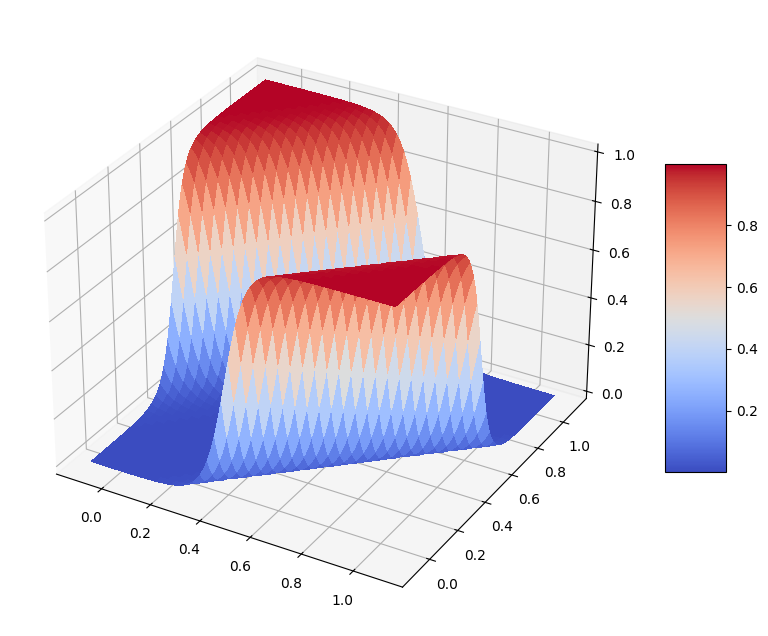

In [109]:
mpl.rcParams['figure.figsize'] = (10,8)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-0.1, 1.1, 0.01)
Y = np.arange(-0.1, 1.1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f_mlp_xor(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-0.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

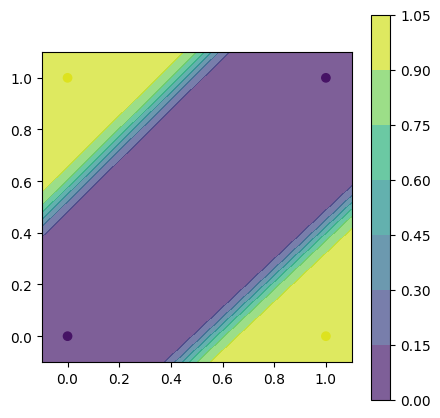

In [110]:
mpl.rcParams['figure.figsize'] = (5,5)

plt.scatter(X_xor[:,0],X_xor[:,1],c=y_xor)
plt.contourf(X, Y, Z, alpha=0.7)
plt.axis('scaled')
plt.colorbar()
plt.show()

A continuación, vamos a tomar otro ejemplo con más puntos. Vamos a tomar un círculo dentro de otro y tomarlo como dos categorías diferentes. Podemos crear el conjunto de entrenamiento con la función *make_circles* de scikit learn.

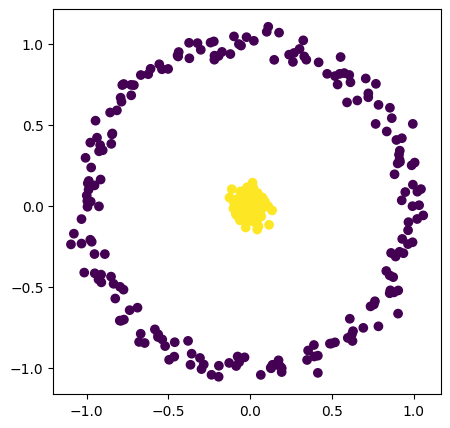

In [111]:
X_circ, y_circ = make_circles(n_samples=400,factor=0.01, random_state=0, noise=0.05)

mpl.rcParams['figure.figsize'] = (5,5) # Para el tamaño de la imagen
plt.scatter(X_circ[:,0],X_circ[:,1],c=y_circ)
plt.show()

Veamos si podemos clasificar este conjunto de entrenamiento. Es interesante probar con distintas arquitecturas y funciones de activación.

In [112]:
mlp_circ = MLPClassifier(hidden_layer_sizes=(3,), max_iter= 100000,activation='logistic',solver='lbfgs')
mlp_circ.fit(X_circ,y_circ)

MLPClassifier(activation='logistic', hidden_layer_sizes=(3,), max_iter=100000,
              solver='lbfgs')

Visualizamos la frontera obtenida

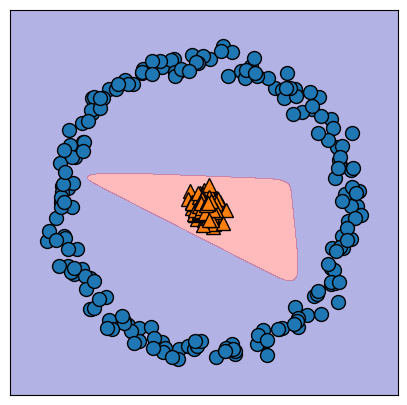

In [113]:
mglearn.plots.plot_2d_separator(mlp_circ, X_circ, fill=True, alpha=.3)
mglearn.discrete_scatter(X_circ[:, 0], X_circ[:, 1], y_circ);

Es interesante comprobar que para este conjunto de entrenamiento, no se obtiene una frontera satisfactoria si la anchura de la red no es mayor que 2, por muchas capas que pongamos. Más información en https://arxiv.org/abs/1810.00393

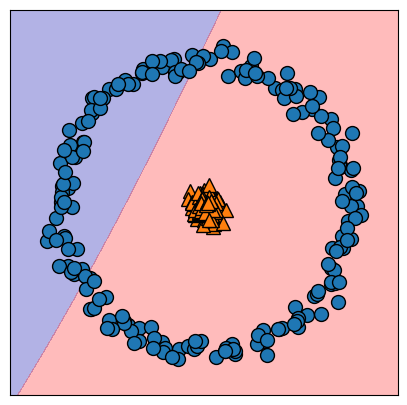

In [115]:
mlp_circ_2 = MLPClassifier(hidden_layer_sizes=(2,2,2,2,2), max_iter= 100000,activation='logistic',solver='lbfgs')
mlp_circ_2.fit(X_circ,y_circ)
mglearn.plots.plot_2d_separator(mlp_circ_2, X_circ, fill=True, alpha=.3)
mglearn.discrete_scatter(X_circ[:, 0], X_circ[:, 1], y_circ);

Podemos seguir probando con conjuntos de datos "de juguete" hasta que consideremos que estamos familiarizados con las redes y el resultado. Vamos a probar con un conjunto un poco más complejo creado mediante la función `make_moons`. Crearemos dos conjuntos de datos aleatorios, en dos clases distintas a partir de dos semicírculos entrelazados (de ahí lo de `make_moons`). Además, dividiremos el conjunto en entrenamiento y prueba con estratificación.

In [119]:
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=3)

X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, stratify=y_moons,
                                                    random_state=42,test_size=0.1)

Podemos representarlo gráficamente

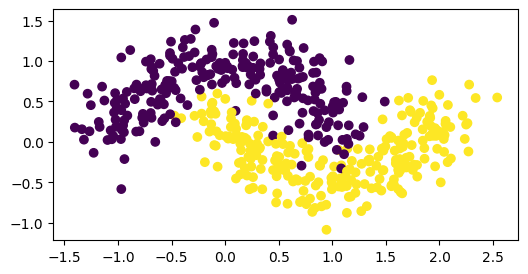

In [120]:
mpl.rcParams['figure.figsize'] = (6,3)
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons)
plt.show()

Podemos representar por separado los conjuntos de entrenamiento y prueba

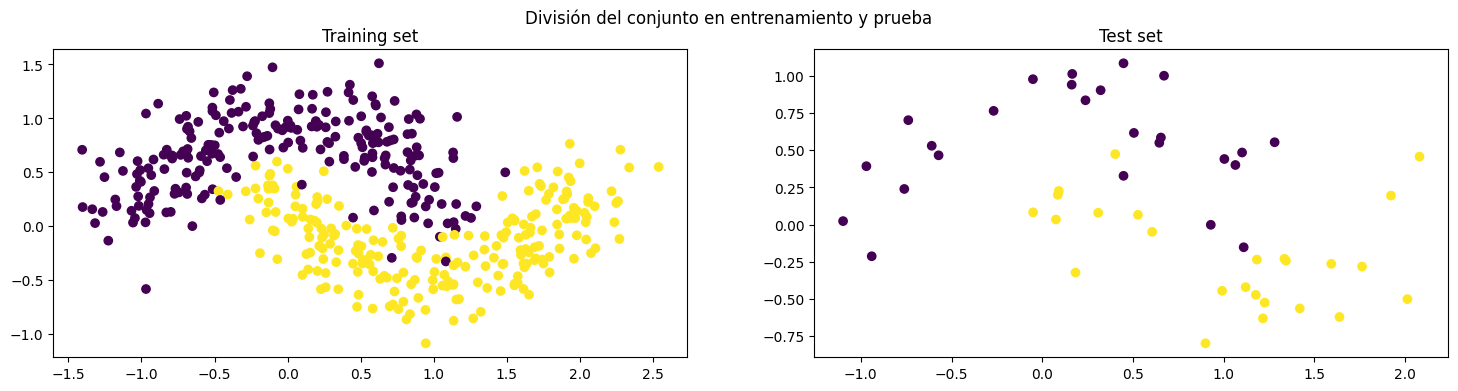

In [121]:
mpl.rcParams['figure.figsize'] = (18,4)
fig, axs = plt.subplots(nrows=1, ncols=2)
ax = axs[0]
ax.scatter(X_moons_train[:,0],X_moons_train[:,1],c=y_moons_train)
ax.set_title('Training set')

ax = axs[1]
ax.scatter(X_moons_test[:,0],X_moons_test[:,1],c=y_moons_test)
ax.set_title('Test set')
fig.suptitle('División del conjunto en entrenamiento y prueba')

plt.show()

A continuación creamos la arquitectura de la red neuronal como una instancia concreta de la clase python 'MLPClassifier' de scikit-learn. Cambiamos alguno de los valores por defecto.

In [122]:
mlp_moons = MLPClassifier(solver='lbfgs',max_iter = 1000, random_state=0)

A continuación entrenamos la red con nuestro conjunto de entrenamiento

In [123]:
mlp_moons.fit(X_moons_train, y_moons_train)

MLPClassifier(max_iter=1000, random_state=0, solver='lbfgs')

Podemos ver la medida de rendimiento de la red una vez entrenada

In [124]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp_moons.score(X_moons_train,y_moons_train))
print("Rendimiento en el conjunto de prueba: ",mlp_moons.score(X_moons_test,y_moons_test))
print("Rendimiento en el conjunto total: ",mlp_moons.score(X_moons,y_moons))

Rendimiento en el conjunto de entrenamiento:  0.9955555555555555
Rendimiento en el conjunto de prueba:  0.94
Rendimiento en el conjunto total:  0.99


El siguiente gráfico nos muestra la frontera de decisión del modelo. Las dos regiones (roja y azul) marcan la clasificación que el modelo aprendido asignaría a los puntos en esas regiones.

La primera cuestión reseñable es que no es una frontera lineal:

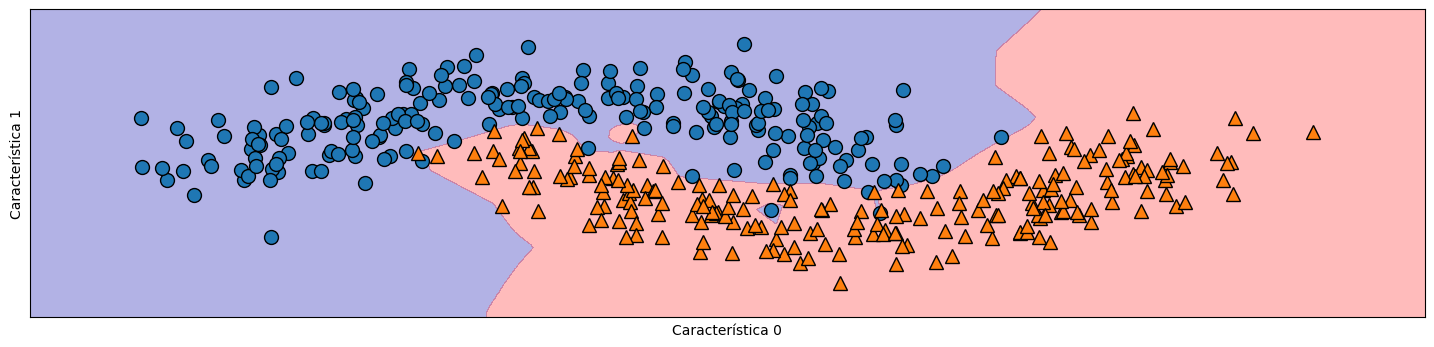

In [125]:
mglearn.plots.plot_2d_separator(mlp_moons, X_moons_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_moons_train[:, 0], X_moons_train[:, 1], y_moons_train)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1");

El número de unidades por defecto en la única capa oculta (100) es muy grande para este conjunto de datos. Vamos a probar con varias configuraciones (número de capas ocultas y neuronas por capa) y medir su rendimiento. Usamos el parámetro `hidden_layer_sizes` para indicar cuántas capas ocultas queremos y cuantas unidades en cada capa:  

In [126]:
mlp_moons_2 = MLPClassifier(solver='lbfgs', random_state=0, max_iter = 1000, hidden_layer_sizes=(2,))

Entrenamos la red:

In [127]:
mlp_moons_2.fit(X_moons_train, y_moons_train)

MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=0,
              solver='lbfgs')

In [128]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp_moons_2.score(X_moons_train,y_moons_train))
print("Rendimiento en el conjunto de prueba: ",mlp_moons_2.score(X_moons_test,y_moons_test))
print("Rendimiento en el conjunto total: ",mlp_moons_2.score(X_moons,y_moons))

Rendimiento en el conjunto de entrenamiento:  0.8888888888888888
Rendimiento en el conjunto de prueba:  0.88
Rendimiento en el conjunto total:  0.888


Veamos la gráfica.

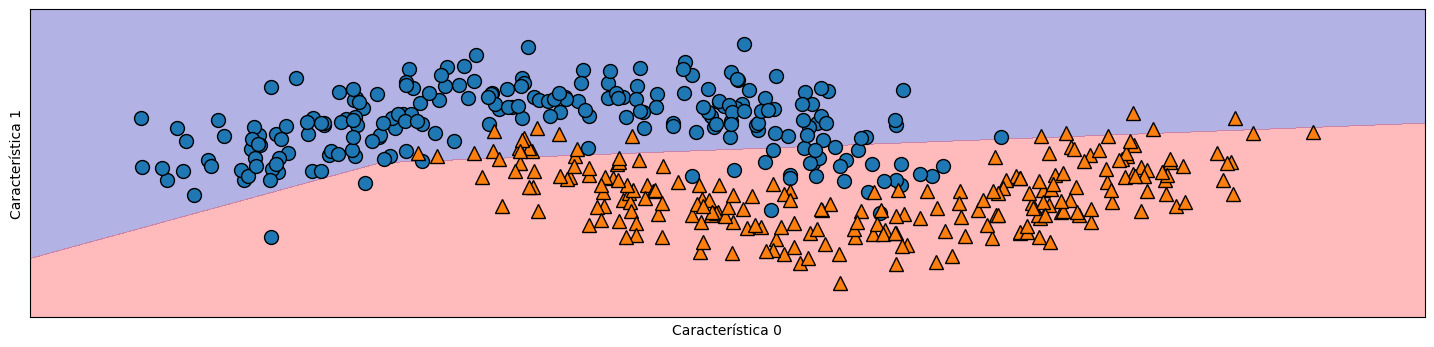

In [129]:
mglearn.plots.plot_2d_separator(mlp_moons_2, X_moons_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_moons_train[:, 0], X_moons_train[:, 1], y_moons_train)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.show()

Podemos hacer varias pruebas cambiando los parámetros que deseemos. Recuerda que no hay una solución que sea la mejor posible para todos los problemas, sino que tendremos que buscar la mejor solución _adaptada a cada problema_. Recuerda: [No free lunch theorem!](https://en.wikipedia.org/wiki/No_free_lunch_in_search_and_optimization)

Definimos la función _probando_, que nos facilita el diseño de pruebas. Puedes modificarla a tu gusto incluyendo nuevos parámetros.

In [130]:
def probando(f_act,capas,mi_max_iter=200):
    mlp_prueba = MLPClassifier(solver='lbfgs', random_state=0,
                               max_iter=mi_max_iter,hidden_layer_sizes=capas,activation=f_act)
    mlp_prueba.fit(X_moons_train, y_moons_train)
    print("Rendimiento en el conjunto de entrenamiento: ",mlp_prueba.score(X_moons_train,y_moons_train))
    print("Rendimiento en el conjunto de prueba: ",mlp_prueba.score(X_moons_test,y_moons_test))
    print("Rendimiento en el conjunto total: ",mlp_prueba.score(X_moons,y_moons))
    mglearn.plots.plot_2d_separator(mlp_prueba, X_moons_train, fill=True, alpha=.3)
    mglearn.discrete_scatter(X_moons_train[:, 0], X_moons_train[:, 1], y_moons_train)
    plt.xlabel("Característica 0")
    plt.ylabel("Característica 1")

Usamos la función para hacer pruebas.

Rendimiento en el conjunto de entrenamiento:  0.98
Rendimiento en el conjunto de prueba:  0.98
Rendimiento en el conjunto total:  0.98


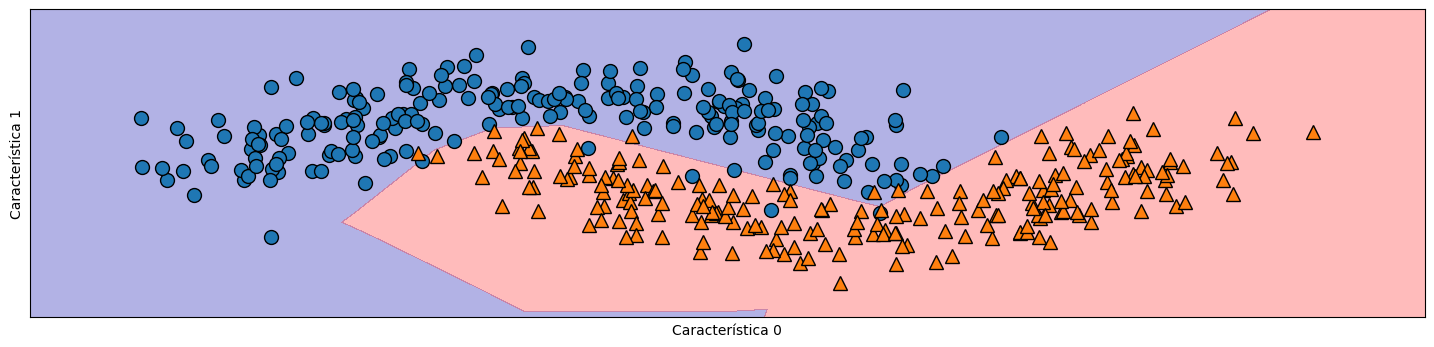

In [131]:
probando('relu',(10,20,))

Rendimiento en el conjunto de entrenamiento:  0.9977777777777778
Rendimiento en el conjunto de prueba:  0.94
Rendimiento en el conjunto total:  0.992


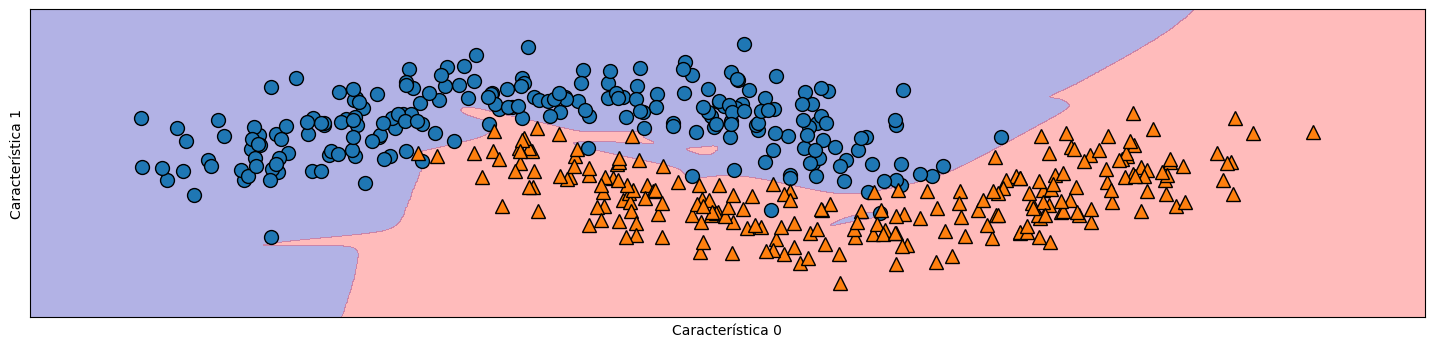

In [132]:
probando('logistic',(10,20,30,),5000)

Rendimiento en el conjunto de entrenamiento:  0.9866666666666667
Rendimiento en el conjunto de prueba:  0.96
Rendimiento en el conjunto total:  0.984


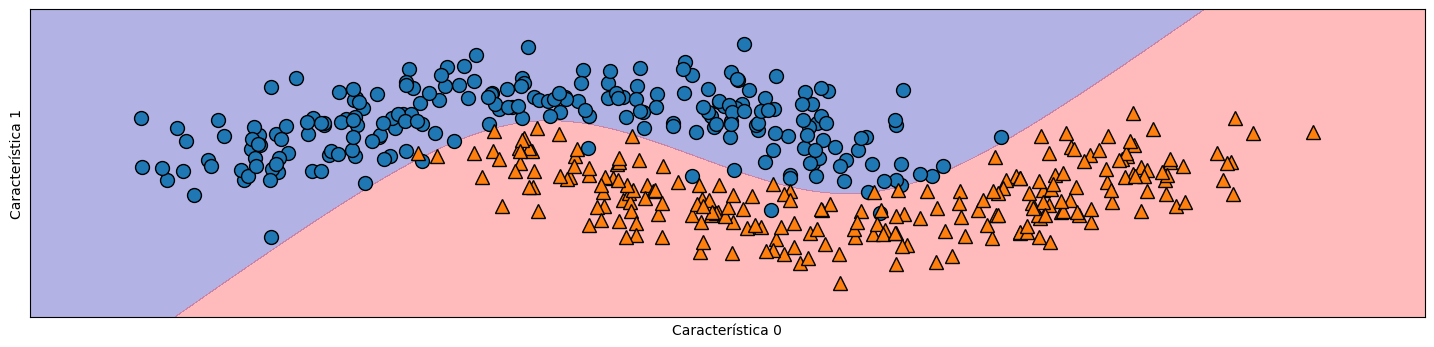

In [133]:
probando('logistic',(2,2,2,),3000)

### Aplicando una red al conjunto de datos iris

Vamos a usar ahora el conjunto de datos iris, que ya usamos para probar los árboles de decisión

In [137]:
iris_dataset = load_iris()

Recordemos cómo eran los datos que nos proporciona scikit learn

In [138]:
iris_dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [139]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

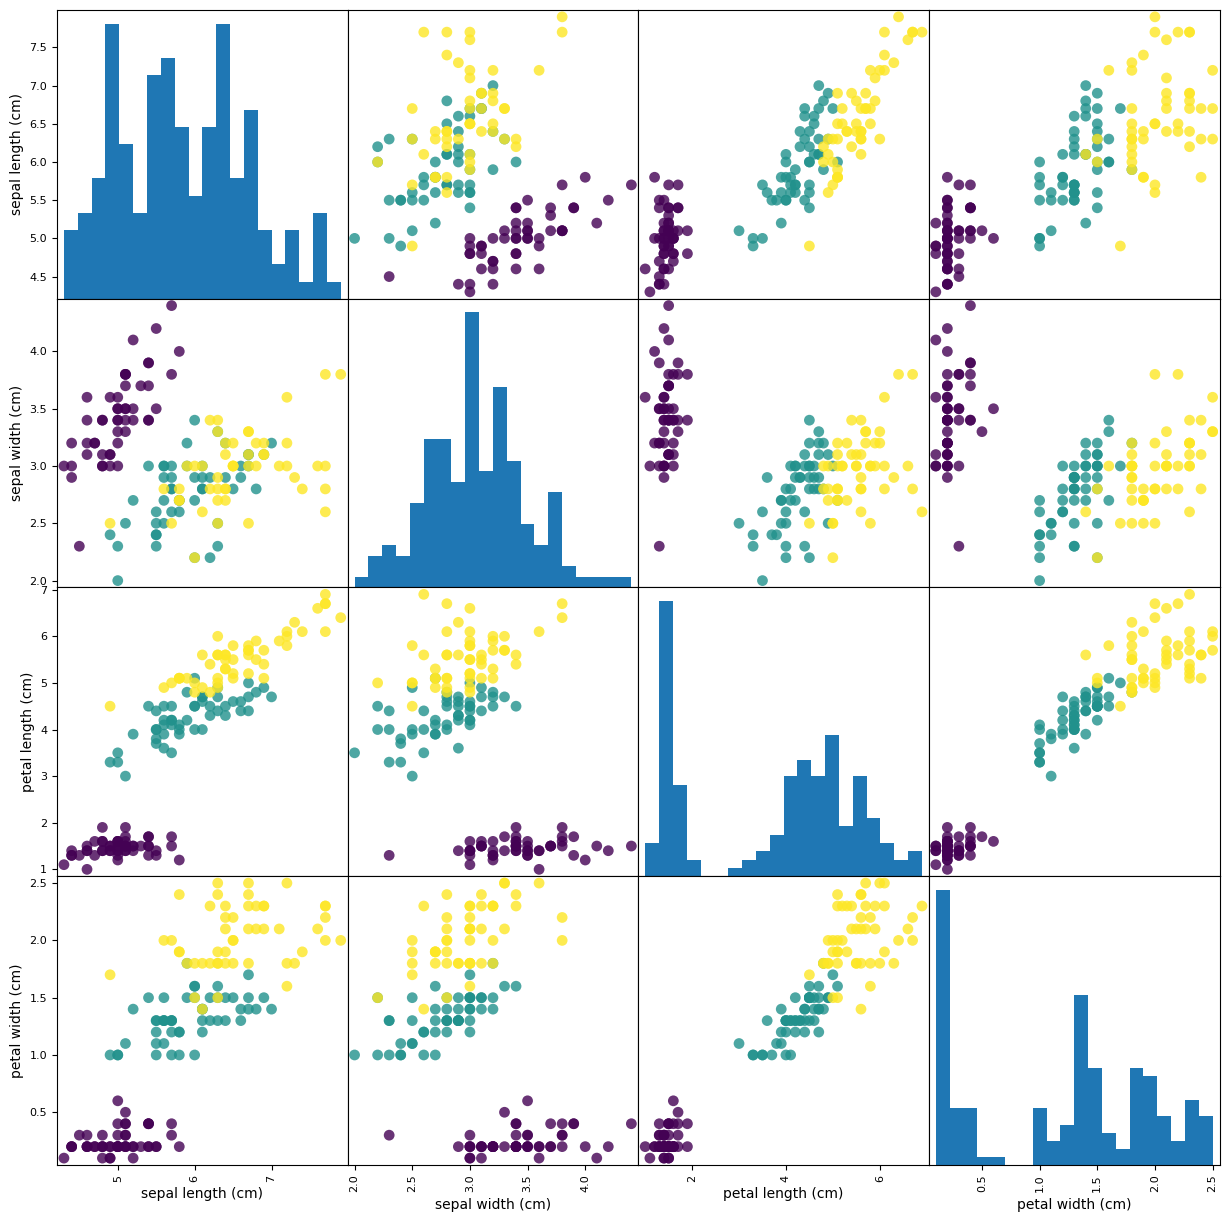

In [140]:
iris_dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
sp = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset.target, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Antes de crear el modelo y entrenarlo, debemos preprocesar los datos. En primer lugar, vamos a normalizar los datos de entrada. En este caso, normalizamos cada vector de entrada de manera que se transforme en un vector de norma 1 según la norma L2.

In [141]:
from sklearn import preprocessing
X_iris = preprocessing.normalize(iris_dataset.data)
X_iris[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [142]:
# Sólo por comprobar que la normalización ha ido bien
i_comp = 57
sum(X_iris[i_comp][j]**2 for j in range(4))

1.0

A continuación vamos a codificar las etiquetas de clasificación con la clasificicación *one-hot*.

In [144]:
y_reshaped = iris_dataset.target.reshape(-1, 1)
y_iris = to_categorical(y_reshaped)


In [145]:
# Vemos algunas de esas etiquetas
y_iris[98:103]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

A continuación dividimos en entrenamiento y prueba

In [146]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris,
                                                    random_state=42,test_size=0.25)

A continuación creamos nuestra red neuronal y la entrenamos

In [147]:
mlp_iris = MLPClassifier(solver='lbfgs', random_state=0,max_iter=1000)
mlp_iris.fit(X_iris_train, y_iris_train)

MLPClassifier(max_iter=1000, random_state=0, solver='lbfgs')

Vemos la medida de rendimiento de nuestra red

In [148]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp_iris.score(X_iris_train,y_iris_train))
print("Rendimiento en el conjunto de prueba: ",mlp_iris.score(X_iris_test,y_iris_test))
print("Rendimiento en el conjunto total: ",mlp_iris.score(X_iris,y_iris))

Rendimiento en el conjunto de entrenamiento:  0.9642857142857143
Rendimiento en el conjunto de prueba:  0.9473684210526315
Rendimiento en el conjunto total:  0.96


Igual que antes, podemos hacer pruebas cambiando la función de activación y la arquitectura

In [149]:
def probando_iris(f_act,capas):
    mlp_prueba = MLPClassifier(solver='lbfgs',
                               random_state=0,
                               hidden_layer_sizes=capas,
                               activation=f_act,
                               max_iter=1000)
    mlp_prueba.fit(X_iris_train, y_iris_train)
    print("Rendimiento en el conjunto de entrenamiento: ",mlp_prueba.score(X_iris_train,y_iris_train))
    print("Rendimiento en el conjunto de prueba: ",mlp_prueba.score(X_iris_test,y_iris_test))
    print("Rendimiento en el conjunto total: ",mlp_prueba.score(X_iris,y_iris))

In [150]:
probando_iris('relu',(5,2,3))

Rendimiento en el conjunto de entrenamiento:  0.9732142857142857
Rendimiento en el conjunto de prueba:  0.9473684210526315
Rendimiento en el conjunto total:  0.9666666666666667


In [151]:
probando_iris('logistic',(3,3,))

Rendimiento en el conjunto de entrenamiento:  0.9910714285714286
Rendimiento en el conjunto de prueba:  0.9473684210526315
Rendimiento en el conjunto total:  0.98


### Aplicando una red neuronal a un conjunto de datos de cáncer de mama

Apliquemos ahora un modelo de redes neuronales a un problema real, el problema de clasificación de cáncer de mama. Para ello tomamos el [*dataset*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) de scikit learn, que a su vez ha sido tomado del [repositorio de la UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Como puede verse en su página web, este conjunto de datos ha sido utilizado para la investigación en cáncer de mama, con publicaciones en revistas de investigación de prestigio.

In [152]:
cancer = load_breast_cancer()

In [153]:
X_cancer = cancer.data
y_cancer = cancer.target
print('Tamaño matriz de datos:', X_cancer.shape)
print('Tamaño matriz de etiquetas:', y_cancer.shape)

Tamaño matriz de datos: (569, 30)
Tamaño matriz de etiquetas: (569,)


Vemos qué aspecto tienen los datos

In [154]:
X_cancer[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [155]:
y_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Vemos el conjutno de los posibles valores

In [156]:
set(y_cancer.tolist())

{0, 1}

Veamos comó varían los datos

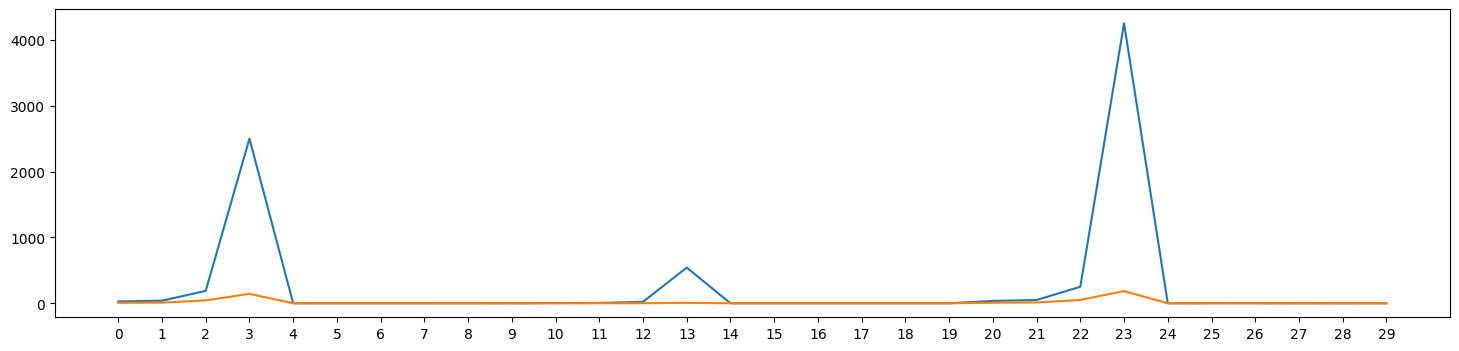

In [158]:
maxs,mins = np.max(X_cancer, axis=0),np.min(X_cancer,axis=0)

ext_inf = 0   # Min 0
ext_sup = 30  # Max 30

plt.plot(maxs[ext_inf:ext_sup])
plt.plot(mins[ext_inf:ext_sup])

plt.xticks(ticks= range(ext_sup - ext_inf), labels = range(ext_inf,ext_sup))
plt.show()

Vemos que hay mucha diferencia en la amplitud de los datos. Vamos a normalizarlos. Lo hacemos transformando los valores de cada atributo para adaptarlos a un intervalo [0,1]. Hay muchas maneras de normalizar los datos (antes lo hemos hecho con la norma L2). Puedes ver una comparativa [aquí](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

In [159]:
X_scaled = (X_cancer - X_cancer.min(axis=0)) / (X_cancer.max(axis=0) - X_cancer.min(axis=0))

Podemos ver la evolución de un atributo concreto en todo el conjunto de entrenamiento

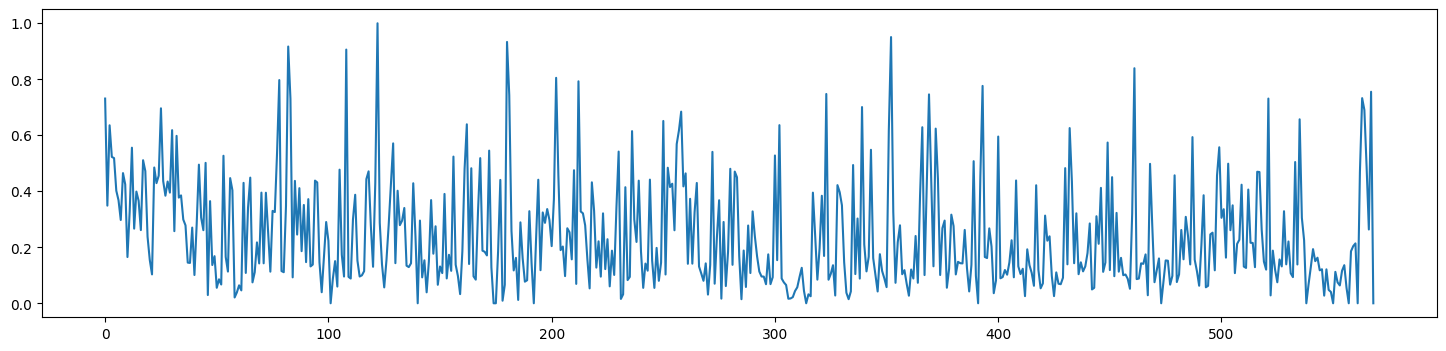

In [160]:
atr_i = 7
plt.plot(X_scaled[:,atr_i])
plt.show()

O podemos verlos todos juntos

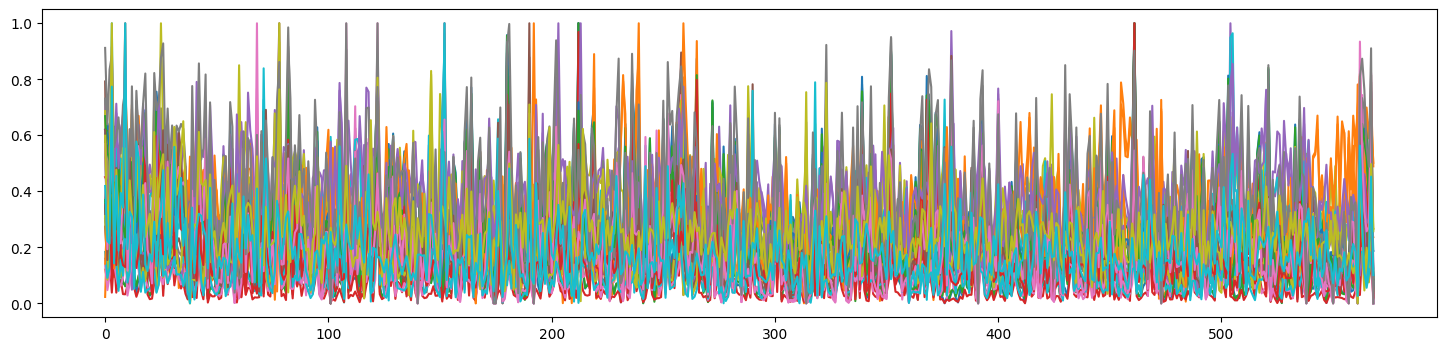

In [161]:
for i in range(X_scaled.shape[1]):
    plt.plot(X_scaled[:,i])
plt.show()

Cada paciente está representada como un vector de 30 componentes. No podemos visualizar un vector de ${\mathbb R}^{30}$ pero podemos proyectar ese vector de 30 componentes en uno de tres. Hay varias técnicas para hacer esto: t-SNE, UMAP, CompressionVAE...

Vamos a usar TSNE para visualizar los datos en 3D. Más información sobre TSNE [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

In [162]:
tsne_3d = TSNE(n_components=3, random_state=10, perplexity=25.0,init='random',learning_rate='auto')
X_3d = tsne_3d.fit_transform(X_scaled)

Representamos los puntos.

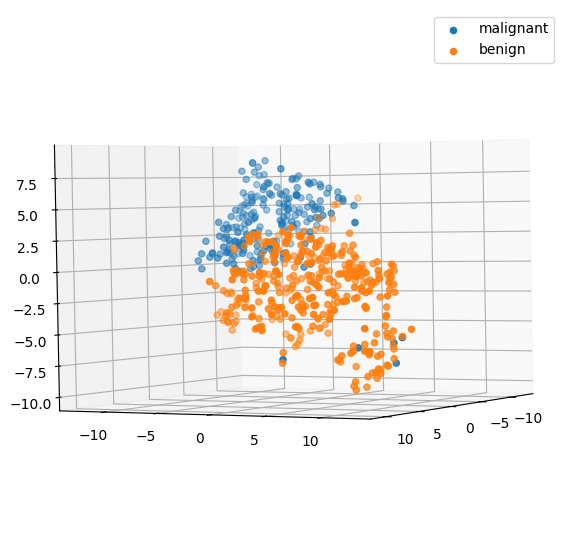

In [68]:
target_ids = range(len(cancer.target_names))

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for i, label in zip(target_ids, cancer.target_names):
    ax.scatter(X_3d[cancer.target == i, 0],
               X_3d[cancer.target == i, 1],
               X_3d[cancer.target == i, 2],label=label)

ax.azim = 30
ax.roll = 1
ax.elev = 1.5

plt.legend()
plt.show()

La visualización de los datos ya nos da pistas de la existencia de [*outliers*](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico), esto es, valores desporporcionadamente fuera del rango.

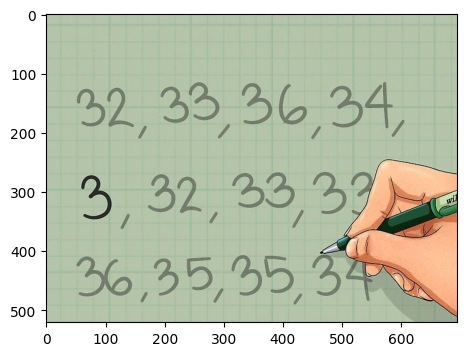

In [164]:
outliers = plt.imread('outliers.jpeg')
plt.imshow(outliers);

En este caso la *scatter_matrix* proporciona poca información.

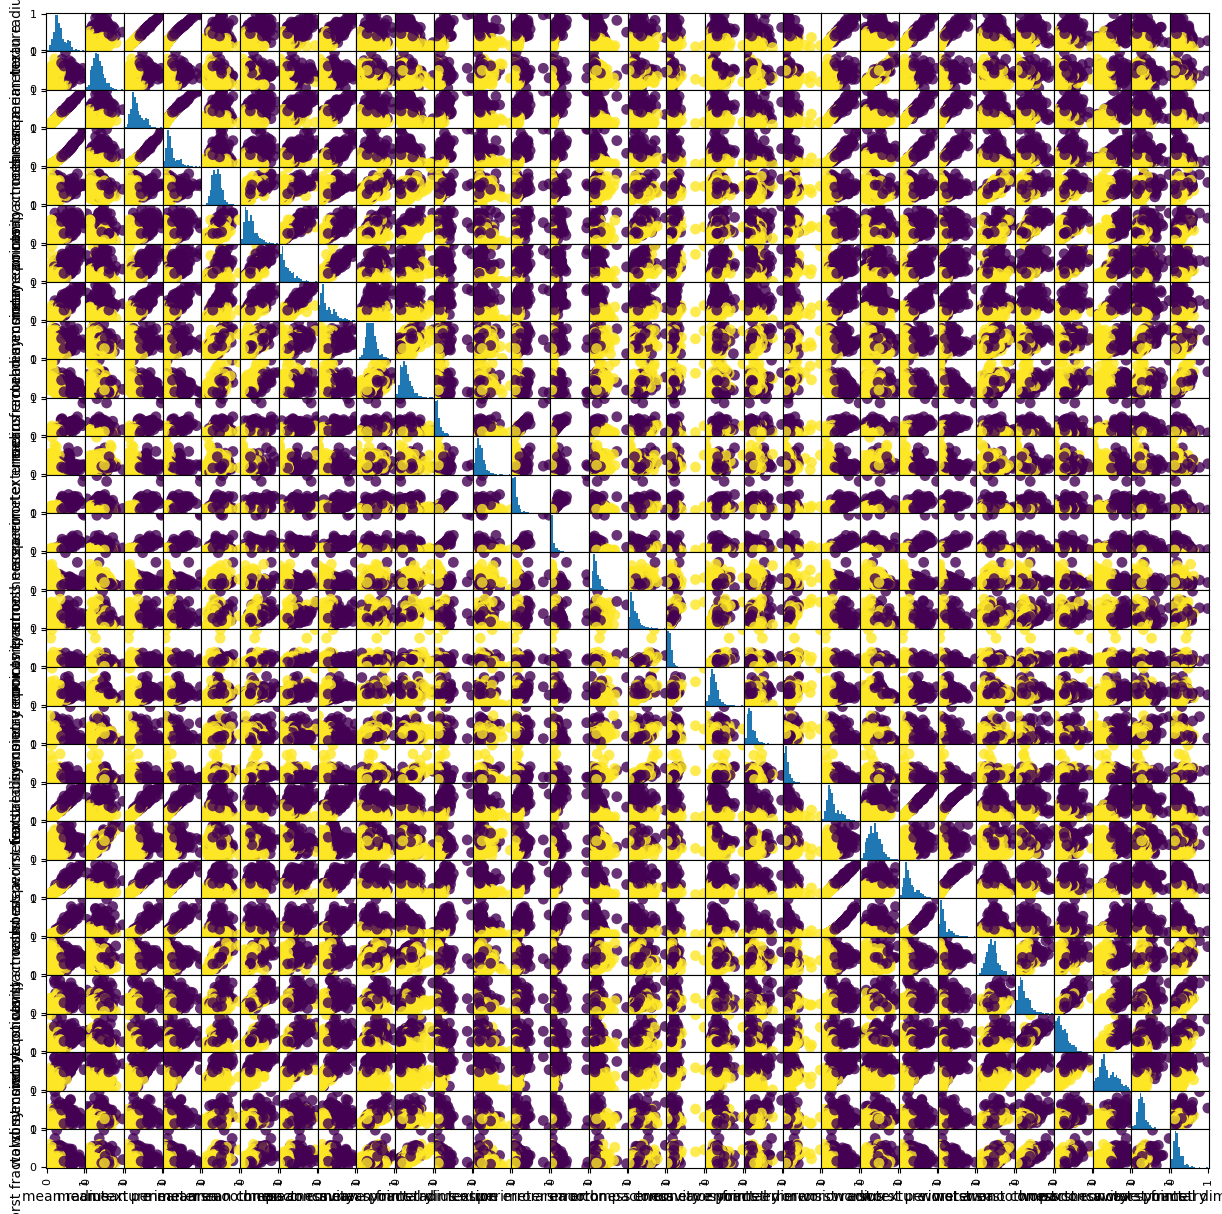

In [165]:
bc_dataframe = pd.DataFrame(X_scaled, columns=cancer.feature_names)
sp = pd.plotting.scatter_matrix(bc_dataframe, c=cancer.target, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Se pueden observar mucho mejor las variables con las *boxplots*,

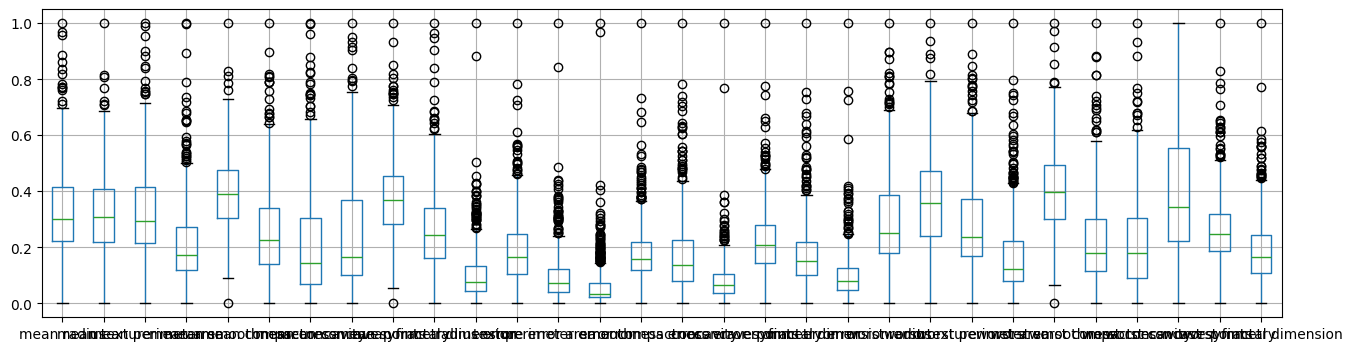

In [166]:
mpl.rcParams['figure.figsize'] = (16,4)
bc_dataframe.boxplot();

Podemos verlas por grupos, en este caso, correspondiente a las 3 primeras columnas.

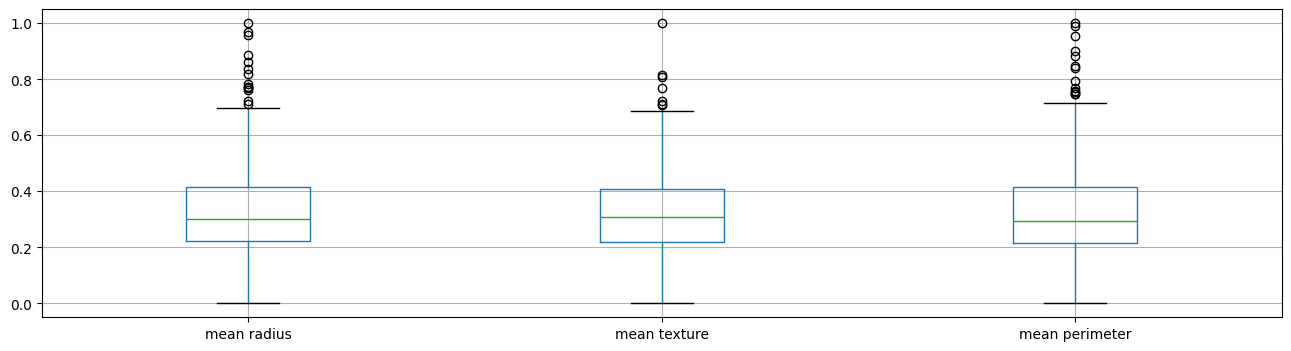

In [167]:
bc_dataframe.iloc[:,0:3].boxplot();

La eliminación de los _outliers_ es un tema muy controvertido, ya que, con la intención de eliminar datos erróneos, podemos estar eliminando datos útiles para el aprendizaje.

Para intentar eliminar los valores anómalos, vamos a elegir una medida que indique cuánto de anómalo es el valor y fijando un umbral a partir del cual consideramos que el dato es un _outlier_ y debe ser eliminado. Obviamente, la elección de la medida y el umbral a partir del cual decidimos que un dato es _outlier_ influirá en el modelo final.

En este caso, lo vamos a hacer con una medida denominada [z-score](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/). Intuitivamente, el *z-score* de un valor nos marca cómo de lejos está ese valor de la media de los datos de ese atributo. Si está desproporcionadamente lejos, podemos pensar que no corresponde a un dato real, sino que es una valor anómalo.

En primer lugar, calculamos los valores z-score de nuestra base de datos

In [168]:
z_scores = np.abs(stats.zscore(bc_dataframe))

In [169]:
z_scores.shape

(569, 30)

A continuación, creamos una nueva base de datos

In [170]:
# Con un umbral alto, quitamos pocos outliers. Con uno bajo, quitamos muchos datos.
umbral = 2.5

# Nos quedamos con los ejemplos tal que el z-score de todos sus valores está por debajo del umbral
nueva = bc_dataframe[(z_scores < umbral).all(axis=1)]
nueva_target = pd.DataFrame(cancer.target)[(z_scores < umbral).all(axis=1)]

In [171]:
print('Tamaño de la matriz de datos original:', bc_dataframe.shape)
print('Tamaño de la nueva matriz de datos   :', nueva.shape)
print('    * Hemos eliminado', bc_dataframe.shape[0] - nueva.shape[0], 'instancias')

Tamaño de la matriz de datos original: (569, 30)
Tamaño de la nueva matriz de datos   : (457, 30)
    * Hemos eliminado 112 instancias


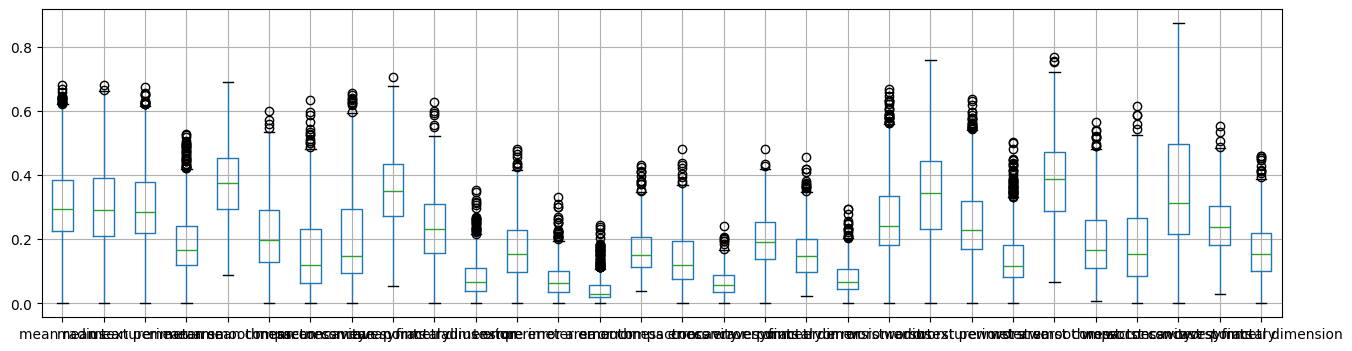

In [172]:
nueva.boxplot();

Representamos los datos como matrices

In [173]:
nuevo_X = nueva.to_numpy()
nuevo_y = nueva_target.to_numpy()

# Redimensionamos las etiquetas para obtener un vector
nuevo_y_aux = nuevo_y.reshape((nuevo_y.shape[0]))

Volvemos a representarlos con TSNE

In [174]:
nuevo_tsne_3d = TSNE(n_components=3, random_state=10, perplexity=25.0,init='random',learning_rate='auto')
nuevo_X_3d = nuevo_tsne_3d.fit_transform(nuevo_X)

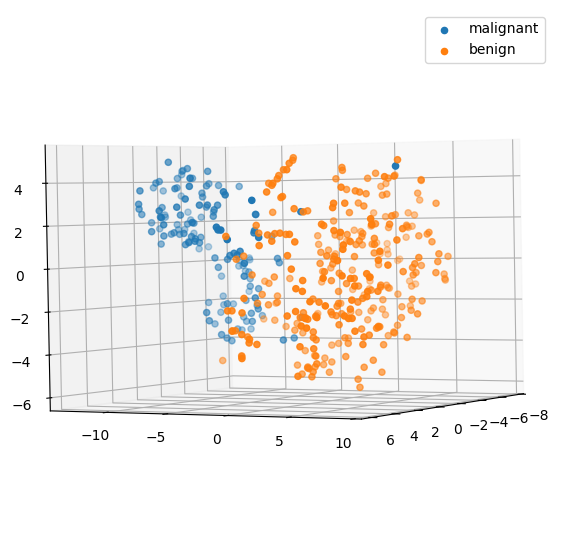

In [175]:
target_ids = range(len(cancer.target_names))

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')



for i, label in zip(target_ids, cancer.target_names):
    ax.scatter(nuevo_X_3d[nuevo_y_aux == i, 0],
               nuevo_X_3d[nuevo_y_aux == i, 1],
               nuevo_X_3d[nuevo_y_aux == i, 2],label=label)

ax.azim = 30
ax.roll = 1
ax.elev = 1.5

plt.legend()
plt.show()

Dividimos ahora en entrenamiento y prueba

In [176]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
     nuevo_X, nuevo_y_aux, stratify=nuevo_y, random_state=2345)

Definimos el modelo cambiando algunos parámetros y entrenamos

In [177]:
mlp = MLPClassifier(solver="lbfgs",max_iter=300,random_state=42,hidden_layer_sizes=(10,2,))
mlp.fit(X_train_cancer, y_train_cancer)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=300, random_state=42,
              solver='lbfgs')

Calculamos el rendimiento después del aprendizaje

In [178]:
print("Rendimiento en entenamiento: {:.2f}".format(mlp.score(X_train_cancer, y_train_cancer)))
print("Rendimiento en el conjunto de prueba: {:.2f}".format(mlp.score(X_test_cancer, y_test_cancer)))

Rendimiento en entenamiento: 0.69
Rendimiento en el conjunto de prueba: 0.70


Podemos hacer pruebas con distintas configuraciones

In [179]:
mlp = MLPClassifier(solver="lbfgs",random_state=0,activation='relu',
                    max_iter = 5000,hidden_layer_sizes=(10, 10, 10))
mlp.fit(X_train_cancer, y_train_cancer)

print("Rendimiento en entrenamiento: {:.3f}".format(
    mlp.score(X_train_cancer, y_train_cancer)))
print("Rendimiento en el conjunto de prueba: {:.3f}".format(mlp.score(X_test_cancer, y_test_cancer)))

Rendimiento en entrenamiento: 0.977
Rendimiento en el conjunto de prueba: 0.965


Intentar comprender qué se ha aprendido en una red neuronal es bastante más difícil que en los modelos lineales o de árboles, y de hecho es un tema de investigación abierto conocido como **XAI (Inteligencia Artificial Explicable)**. Una manera de tratar de explicar lo aprendido es analizando la magnitud de los pesos de las diferentes capas.

Lo que sigue es un gráfico que mediante colores ilustra la intensidad de los distintos pesos de la primera capa oculta, para cada una de las características. En este caso hay tantas filas como atributos (esto es, como neuronas en la capa de entrada) y tantas filas como neuronas en la primera capa oculta.

Un peso de valor absoluto alto significa que ese atributo tendrá mucha influencia en la salida de la neurona correspondiente. En cambio si el valor del peso es muy próximo a cero, significa que el valor de ese atributo apenas influye en la salida de la neurona.  

Esto nos podría dar una idea del grado de importancia de cada atributo, aunque también podría significar que la actual arquitectura de la red no ha sido capaz de calcular de manera apropiada el valor del peso

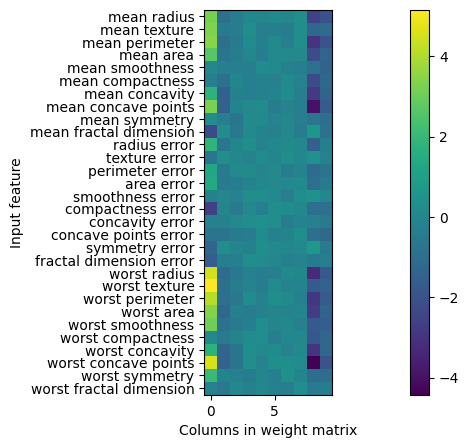

In [180]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()